# **Face recognition**




**DOMAIN**: Entertainment

**CONTEXT**:   The dataset comprises of images and its mask where there is a human face

**PROJECT OBJECTIVE:** 

Face Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people. All images are taken 
from 'Pinterest' and aligned using dlib library.
The objective is to recognise whether two given faces are of the same person or not.

**APPROACH:**

In this notebook , the ask is to obtain distances between any two images.We will obtain embedding vectors for each image using a pre-trained VGG Face  and we will then calculate distance(using a distance metric) between these images/vectors.

In addition to the above , we have also been asked to classify the face/image using an SVM  model

An extension to this tutorial ,a Saimese network can be built be built using the embeddings we generated earlier to recognize whether two images are the same or different(This is not done in notebook but can considered as follow up task)






# Settings/Configuration

In [23]:
# Lets check version of tensor flow and keras installed 

import tensorflow
print(tensorflow.__version__)

2.5.0


In [24]:
import keras
print(keras.__version__)

2.5.0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Lets check if we are connected to GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


In [3]:
## Import necessary libraries

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import statistics as stats
sns.set(color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Last import allows multiple outputs from one cell
import warnings
# Initialize the random number generator
import random
random.seed(0)

In [4]:
# Useful Configuration/Setting

# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

#Setting to shows all entries in array displayed
np.set_printoptions(threshold=sys.maxsize)

# Import/Read & View original Data

In [29]:
# Read The Data Set


images_path = "/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part2_FaceRecognition/Data/Part2_ Aligned Face Dataset from Pinterest.zip"

# Since its a zio file , we need to extract it 
from zipfile import ZipFile
with ZipFile(images_path,'r') as zfile:
  zfile.extractall()

In [30]:
# Validate folder structure 
!ls

# We can see below our Part2_ Aligned Face Dataset from Pinterest folders are present 

 drive	'Part2_ Aligned Face Dataset from Pinterest'   sample_data


In [31]:
#var for working directoy
workingDirectoryFilepath='/content/Part2_ Aligned Face Dataset from Pinterest/PINS/'

In [32]:
# Dimensions of originial Data
### Lets try to first check no of Train images and Test Images
import os
all_folds = os.listdir(workingDirectoryFilepath)
all_folds = [x for x in all_folds if '.' not in x]
print(len(all_folds))
print(all_folds)

count=0
for i in range(0,len(all_folds)):
      all_files=os.listdir(workingDirectoryFilepath+'/'+all_folds[i])
      print("Class Name-",all_folds[i]," No of Images under this class-",len(all_files)," One Sample file name-",all_files[0]) 
      count=count +len(all_files)

print('Total No of images in the data' , count)
# All classes are displayed below 
# Count of each class displayed below 
# One image file name printed under each class(just as an example)
# Total count of all images displayed below

100
['pins_Brenton Thwaites', 'pins_Emily Bett Rickards', 'pins_Chris Evans', 'pins_Kit Harington', 'pins_grant gustin face', 'pins_Chance Perdomo', 'pins_Stephen Amell', 'pins_Natalie Portman_', 'pins_Josh Radnor', 'pins_Emilia Clarke', 'pins_amber heard face', 'pins_elizabeth olsen face', 'pins_Tom Cavanagh', 'pins_Jesse Eisenberg', 'pins_Scarlett Johansson', 'pins_Benedict Cumberbatch', 'pins_Caity Lotz', 'pins_Kumail Nanjiani', 'pins_Maisie Williams', 'pins_Sophie Turner', 'pins_bellamy blake face', 'pins_barbara palvin face', 'pins_Wentworth Miller', 'pins_jeff bezos', 'pins_shakira', 'pins_david mazouz', 'pins_Amanda Crew', 'pins_Morena Baccarin', 'pins_selena gomez', 'pins_Martin Starr', 'pins_Jeremy Renner', 'pins_lindsey morgan face', 'pins_dua lipa face', 'pins_anne hathaway', 'pins_millie bobby brown', 'pins_Dave Franco', 'pins_Sarah Wayne Callies', 'pins_Thomas Middleditch', 'pins_Alvaro Morte', 'pins_Ursula Corbero', 'pins_Dwayne Johnson', 'pins_Danielle Panabaker', 'pins_

-  The Data is provided to us a total of 10,770 Images and 100 classes(celebrities in this case)


Text(0.5, 1.0, 'zendaya')

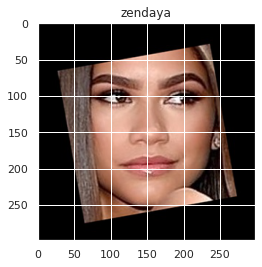

In [33]:
# Lets visualise ORIGINAL/ Non Augmented  data 
# We will visualise 1 or 2 images randomly

# importing pyplot and image from matplotlib
#import matplotlib.pyplot as plt
import matplotlib.image as img
  
# reading png image file
im = img.imread(workingDirectoryFilepath + 'pins_zendaya/zendaya0.jpg')
#/content/Part2_ Aligned Face Dataset from Pinterest/PINS/pins_zendaya/zendaya0.jpg
  
# show image
plt.title('zendaya')
plt.imshow(im)


In [34]:
# Lets also print original image dimensions
import PIL
image = PIL.Image.open(workingDirectoryFilepath + 'pins_zendaya/zendaya0.jpg')

width, height = image.size
channels=len(image.getbands())
print(width, height,channels)


299 299 3


Text(0.5, 1.0, 'rihanna')

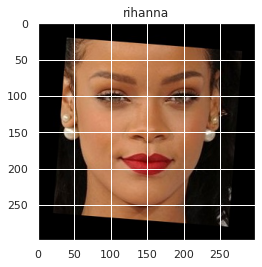

In [35]:
# Lets visualise ORIGINAL/ Non Augmented  data 
# We will visualise 1 or 2 images randomly

# importing pyplot and image from matplotlib
#import matplotlib.pyplot as plt
import matplotlib.image as img
  
# reading png image file
im = img.imread(workingDirectoryFilepath + 'pins_rihanna/rihanna0.jpg')
  
# show image
plt.title('rihanna')
plt.imshow(im)


In [36]:
# Lets also print original image dimensions
import PIL
image = PIL.Image.open(workingDirectoryFilepath + 'pins_rihanna/rihanna0.jpg')

width, height = image.size
channels=len(image.getbands())
print(width, height,channels)

299 299 3


-  Original data waas visualised
-  All images seem to be aligned and have dimensions (299,299,3)

In [37]:
## Blank Space Delimiter


## Blank Space Delimiter

#  Data Pre-processing
- Data currently is in folders with the label name corresponding to folder name 

- Lets format the data into an appropriate format so that we can feed it into out models

- Pickle and save for subsequent use

In [38]:
# Lets set some commonly used variables

batch_size=10770 # We will use entire DS , do not want batches 
# We will use 224 as size in Data Generator just to ensure all are of the same size
#NTS: If not for the boave , resizing of any kind we dont need  
image_size=224 

In [72]:
# Get The Data
### The data is currently in image format in folders 
### Lets retrieve this data Using tensorflow -ImageDataGenerator Utility
### We will not do any augmentation on data
### binary/integer labels will be given to dat from 0-99


from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Only Normalisation is done as it is required for NN
datagen = ImageDataGenerator(rescale = float(1.0/255.))

dsConverted = datagen.flow_from_directory(workingDirectoryFilepath[:-1],
                                                 target_size=(image_size, image_size),
                                                 batch_size = batch_size,
                                                 shuffle=False,
                                                 seed=1,
                                                 class_mode='binary'
                                                   )

Found 10770 images belonging to 100 classes.


In [73]:
#Lets exttract X and Y 
X,Y=next(dsConverted)# Note we have only one batch = entire data here 

In [74]:
# Lets check the size 
X.shape
Y.shape

# Shapes look good

(10770, 224, 224, 3)

(10770,)

In [75]:
# Convert labels to integers
Y.astype(int)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2

In [76]:
# Lets check one sample record of each
Y[0]
#X[0]

0.0

In [77]:
Y=Y.astype(int)

In [78]:
# Lets have a look at labels assigned
# Lets capture keys and values in lists 
classIndicesDict=dsConverted.class_indices
type(classIndicesDict)
dict_key_list = list(classIndicesDict.keys())
dict_val_list = list(classIndicesDict.values())
 

dict

In [79]:
# Pickle/Save dict_key_list & dict_val_list
np.save("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part2_FaceRecognition/SavedModels/dict_key_list.npy",dict_key_list)
np.save("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part2_FaceRecognition/SavedModels/dict_val_list.npy",dict_val_list)

Text(0.5, 1.0, 'Neil Patrick Harris')

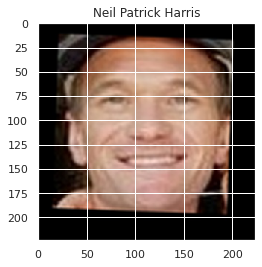

In [80]:
# Lets view a sample X and Y 
# Lets choose record 4568 at random

plt.title(dict_key_list[dict_val_list.index(Y[4568])][5:])
plt.imshow(X[4568])



In [81]:
# Lets pickle/save the data
# NTS: to_pickle function not available , have to use save and in npy format 
np.save("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part2_FaceRecognition/SavedModels/X.npy",X)

In [82]:
np.save("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part2_FaceRecognition/SavedModels/Y.npy",Y)

- Data has been converted to an appropriate format for further use in modeliing etc

In [83]:
## Blank Space Delimiter


## Blank Space Delimiter

# Retrieve Prepared Data

In [121]:
X=np.load("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part2_FaceRecognition/SavedModels/X.npy")

In [85]:
Y=np.load("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part2_FaceRecognition/SavedModels/Y.npy")

In [86]:
# Validate that data looks good
X.shape
Y.shape

# Retrieved data looks good 

(10770, 224, 224, 3)

(10770,)

In [87]:
## Blank Space Delimiter


## Blank Space Delimiter

# Generate Embedding Vectors
**Approach**

- Build the VGGFace model(architecture) until the FC layer  

- Load VGG Face weights

- Run the images on the model to get vectors


In [88]:
# First Create the model
# We are using the Pretrained VGGFace Model
# NTS: VGGFace model is a different "model" by itself 
# NTS: VGGFace is currently not available directly in keras libraries as an API
# NTS: We can either use a third party implementation or build the model ourselves(with pretrained weights loaded)

# We will be creating the model(architecture) and then using pretrained weights made available to us

In [55]:
# Create VGGFace Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Flatten, Activation, Convolution2D, MaxPooling2D, Dropout,ZeroPadding2D

	
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
# We will not be adding softmax layer here as we want only the flattened layer o/p
#model.add(Activation('softmax'))


In [56]:
# Load the weights
model.load_weights("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part2_FaceRecognition/SavedModels/Part 2 - vgg_face_weights.h5")

In [91]:
# View the built model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [57]:
VGGFaceModel=model

In [92]:
# Generate embeddings for all images

In [93]:
# Empty list to store vectors
imageVectors=[]
for eachImage in X:
  imageVectors.append(model.predict(np.expand_dims(eachImage, axis = 0)))


In [94]:
# Convert list to array
imageVectors=np.array(imageVectors)

In [95]:
# Check Size of embedding vector
imageVectors.shape

#Shape looks goos , as expected 

(10770, 1, 2622)

In [96]:
# Check  embedding vector for any one image
imageVectors[0]

array([[ 3.18700038e-02, -1.47065148e-02, -1.25547871e-02,
         1.96693037e-02, -1.61581486e-03,  1.13688121e-02,
         1.56872030e-02,  7.62445573e-03,  1.53152095e-02,
         7.18355924e-03,  2.81366650e-02,  1.82816721e-02,
         3.41085382e-02,  2.05039103e-02,  2.82167941e-02,
         3.79943801e-03,  2.35201698e-02,  2.53328029e-02,
        -1.05849290e-02,  2.52311374e-03,  1.43579528e-04,
         2.55210083e-02,  5.17343637e-03,  2.50643846e-02,
        -1.22927064e-02,  1.31467236e-02, -3.34851956e-03,
        -3.79887363e-03,  8.22839513e-03,  1.52171766e-02,
         1.37020079e-02, -4.80522122e-03, -1.34355957e-02,
         1.18573308e-02,  9.77155752e-03,  1.03531498e-03,
         6.79423800e-03, -8.26062169e-03,  8.08228739e-03,
         6.33408502e-03,  3.19806971e-02,  1.88888900e-03,
        -3.57311079e-03, -9.90118831e-03,  2.40634941e-03,
        -1.49717173e-02,  4.19674208e-03, -9.19833407e-03,
         1.80505849e-02,  1.59838200e-02,  7.03582447e-0

In [97]:
np.save("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part2_FaceRecognition/SavedModels/EVector.npy",imageVectors)

# Retrieve Pickled Objects

In [5]:
imageVectors=np.load("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part2_FaceRecognition/SavedModels/EVector.npy")

In [6]:
# Validate that vector looks good
imageVectors.shape

(10770, 1, 2622)

In [100]:
X=np.load("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part2_FaceRecognition/SavedModels/X.npy")

In [7]:
Y=np.load("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part2_FaceRecognition/SavedModels/Y.npy")

In [102]:
# Validate that data looks good
X.shape
Y.shape

# Retrieved data looks good 

(10770, 224, 224, 3)

(10770,)

In [8]:
# Pickle/Save dict_key_list & dict_val_list
dict_key_list=np.load("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part2_FaceRecognition/SavedModels/dict_key_list.npy")
dict_val_list=np.load("/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part2_FaceRecognition/SavedModels/dict_val_list.npy")

In [104]:
## Blank Space Delimiter


## Blank Space Delimiter

# Build a distance metric

In [105]:
import tensorflow.keras.backend as K
def euclidean_distance(vectors):
# unpack the vectors into separate lists
    (featsA, featsB) = vectors

# compute the sum of squared distances between the vectors
    sumSquared = K.sum(K.square(featsA - featsB), axis=1, keepdims=True)

# return the euclidean distance between the vectors
    return K.sqrt(K.maximum(sumSquared, K.epsilon()))
    # epsilon just in case it becomes 0
    # if you give exact same image , will become 0

In [106]:
## Blank Space Delimiter


## Blank Space Delimiter

# Distance between images
- Display distance between some positive(same class/person) images and some negative(different class/person) images


In [107]:
# Lets take at random image no 10 and image number 50
# We know it will be of the same person due to the order
# Lets calculate distance and display the same

distanceImg10_Img50 =euclidean_distance((imageVectors[10],imageVectors[50]))
distanceImg10_Img50

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.4362511]], dtype=float32)>

Text(0.5, 0.98, 'Distancetf.Tensor([[0.4362511]], shape=(1, 1), dtype=float32)')

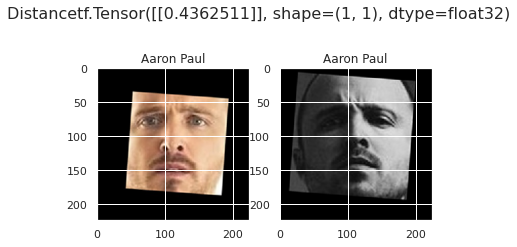

In [108]:

fig = plt.figure()
fig.suptitle("Distance"+str(distanceImg10_Img50), fontsize=16)
ax1 = fig.add_subplot(121)
plt.imshow(X[10])
ax2 = fig.add_subplot(122)
plt.imshow(X[50])
#ax3 = fig.add_subplot(223)
#ax4 = fig.add_subplot(224)
ax1.title.set_text(str(dict_key_list[list(dict_val_list).index(Y[10])][5:]))
ax2.title.set_text(str(dict_key_list[list(dict_val_list).index(Y[50])][5:]))
plt.show()


In [108]:
# Lets try 2 different images 

In [110]:
# Lets take at random image no 10 and image number 380
# We know it will be of the same person due to the order
# Lets calculate distance and display the same

distanceImg10_Img50 =euclidean_distance((imageVectors[10],imageVectors[380]))
distanceImg10_Img50

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.75789005]], dtype=float32)>

Text(0.5, 0.98, 'Distancetf.Tensor([[0.75789005]], shape=(1, 1), dtype=float32)')

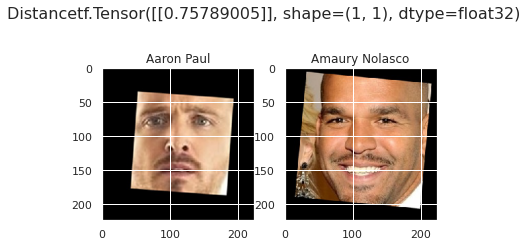

In [112]:

fig = plt.figure()
fig.suptitle("Distance"+str(distanceImg10_Img50), fontsize=16)
ax1 = fig.add_subplot(121)
plt.imshow(X[10])
ax2 = fig.add_subplot(122)
plt.imshow(X[380])
#ax3 = fig.add_subplot(223)
#ax4 = fig.add_subplot(224)
ax1.title.set_text(str(dict_key_list[list(dict_val_list).index(Y[10])][5:]))
ax2.title.set_text(str(dict_key_list[list(dict_val_list).index(Y[380])][5:]))
plt.show()


Inference/Result
- We have displayed sictances between 2 simialr and two dissimilar images above
- As we can see above , the distance is significantly higher for dissimilar images

In [ ]:
## Blank Space Delimiter


## Blank Space Delimiter

# Build SVM
**Approach**
- Split Data(feature vectors) into X_Train and Y_Train
- Scale Both above 
- Apply PCA on Data(feature vectors)
- Build and SVM model on Data(feature vectors)
- Log Train and Test result

In [234]:
#Generated image vectors is our data to work on-> Thsi will be X
# Lebsl will be Y 
# Lets split into Train and Test
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test=train_test_split(imageVectors,Y,test_size=0.3,random_state=1,stratify=Y)
print("X_Train.shape",X_Train.shape)
print("X_Test.shape",X_Test.shape)
print("Y_Train.shape",Y_Train.shape)
print("Y_Test.shape",Y_Test.shape)

X_Train.shape (7539, 1, 2622)
X_Test.shape (3231, 1, 2622)
Y_Train.shape (7539,)
Y_Test.shape (3231,)


In [235]:
# Convert to appropirate dimesnions 
X_Train=X_Train.reshape(7539,2622)
X_Test=X_Test.reshape(3231,2622)

In [236]:
print("X_Train.shape",X_Train.shape)
print("X_Test.shape",X_Test.shape)


X_Train.shape (7539, 2622)
X_Test.shape (3231, 2622)


In [237]:
# Scale the data
#Applying MinMax Scalar
from sklearn.preprocessing import StandardScaler
stdTrain=StandardScaler()
stdTest=StandardScaler()
X_Train = pd.DataFrame(stdTrain.fit_transform(X_Train))
X_Test = pd.DataFrame(stdTest.fit_transform(X_Test))

In [238]:
# Check if original balance maintained
#print("Class Ratio in Training Set",pd.DataFrame(Y_Train).value_counts(normalize=True))
#print("Class Ratio in Testing Set",pd.DataFrame(Y_Test).value_counts(normalize=True))
#print("\033[1m \033[94m Ratio has been maintained across Train and Test sets \n")

In [239]:
from sklearn.decomposition import PCA
#We will start of by applying PCA on all 18 dimensions and obseve results
#Applying data on complet X train

pca = PCA(n_components=2622)
pca.fit(X_Train)

#Lets check the  % of variance explained by each of the 2622 dimensions
np.set_printoptions(suppress=True)
#print(pca.explained_variance_ratio_)

PCA(copy=True, iterated_power='auto', n_components=2622, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Cum of variation explained')

Text(0.5, 0, 'eigen Value')

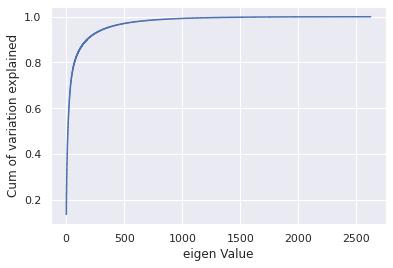

0.9706886

In [240]:
# Cumalative Graph
plt.step(list(range(1,2623)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

np.cumsum(pca.explained_variance_ratio_)[500]

# We can see here that the first 500 diemnsions explain the maximum varaince of 97%
# Lets reduce our diemnsions to 700

In [241]:
# create PCA model for 500 features only 
# Fit train data and transform test data
pca3 = PCA(n_components=500)
pca3.fit(X_Train)
X_Train = pca3.transform(X_Train)
# Lets Also Apply The transformation to Test Data and keep the Test data ready
X_Test=pca3.transform(X_Test)

PCA(copy=True, iterated_power='auto', n_components=500, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [242]:
X_Train.shape
X_Test.shape

(7539, 500)

(3231, 500)

In [243]:
# Build SVM

from sklearn.svm import SVC
model=SVC(random_state=1)

#Train/Fit Data set
model=model.fit(X_Train,Y_Train)

In [244]:
# Check score on training data
print("Score on training data is = " ,model.score(X_Train,Y_Train))
#Check score on testing data
print("Score on testing data is = " ,model.score(X_Test,Y_Test))

Score on training data is =  0.9978777026130786
Score on testing data is =  0.9631692974311359


In [245]:
SVMModel=model

**Result**
- We have 99% accuracy on Train and 96% on Test

In [ ]:
## Blank Space Delimiter


## Blank Space Delimiter

# Prediction
- We have been given two images to predict the label(name of the celeb)
-Run the image through VGGFace model to get embedings
-Use the SVM Model to predict the label from the embeddings

In [255]:
import cv2
test_image = cv2.imread('/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part2_FaceRecognition/Prediction/Image 2.jpg')


In [259]:
#test_image
#Test image has values between (0,255) so we need to scale image

In [260]:
## Same preprocessing done on all models need to be done here 

test_image = cv2.resize(test_image,(224,224))
# Lets resize to shape we are expecting

test_image_convertedToRGB = cv2.cvtColor(test_image, cv2.COLOR_RGB2BGR)

# Lets scale image
test_image_convertedToRGB=test_image_convertedToRGB/255

# Convert Image to RGB

# Check if the size of the Image array is compatible with Keras model
print(test_image_convertedToRGB.shape)
# Would need to expand dimension , will be done later 

(224, 224, 3)


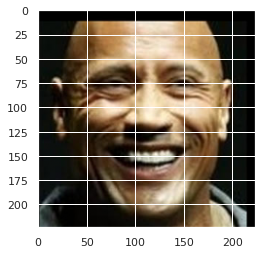

In [261]:
plt.imshow(test_image_convertedToRGB)

In [266]:
# Get the embddings of this image
embeddingImage1=VGGFaceModel.predict(np.expand_dims(test_image_convertedToRGB, axis = 0))

In [267]:
# Scale embedding
embeddingImage1 = pd.DataFrame(stdTest.transform(embeddingImage1))

In [268]:
# Apply PCA and transform
embeddingImage1=pca3.transform(embeddingImage1)

In [269]:
# Use SVM to predict label
label=SVMModel.predict(embeddingImage1)
print(label)

[19]


In [270]:
dict_key_list[list(dict_val_list).index(label)][5:]

'Dwayne Johnson'

Text(0.5, 1.0, 'Dwayne Johnson')

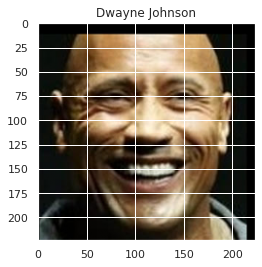

In [271]:
plt.imshow(test_image_convertedToRGB)
plt.title(dict_key_list[list(dict_val_list).index(label)][5:])

**Result**
- Model has predicted Image 1 correctly

In [272]:
## Blank Space Delimiter


## Blank Space Delimiter

In [273]:
import cv2
test_image = cv2.imread('/content/drive/MyDrive/AIML/Deep_Learning/ComputerVision/Part2_FaceRecognition/Prediction/Image 2A.jpg')


In [274]:
#test_image
#Test image has values between (0,255) so we need to scale image

In [275]:
## Same preprocessing done on all models need to be done here 

test_image = cv2.resize(test_image,(224,224))
# Lets resize to shape we are expecting

test_image_convertedToRGB = cv2.cvtColor(test_image, cv2.COLOR_RGB2BGR)

# Lets scale image
test_image_convertedToRGB=test_image_convertedToRGB/255

# Convert Image to RGB

# Check if the size of the Image array is compatible with Keras model
print(test_image_convertedToRGB.shape)
# Would need to expand dimension , will be done later 

(224, 224, 3)


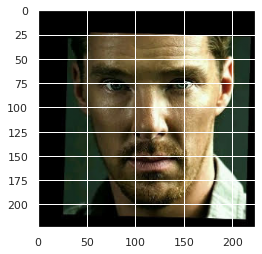

In [276]:
plt.imshow(test_image_convertedToRGB)

In [277]:
# Get the embddings of this image
embeddingImage1=VGGFaceModel.predict(np.expand_dims(test_image_convertedToRGB, axis = 0))

In [278]:
# Scale embedding
embeddingImage1 = pd.DataFrame(stdTest.transform(embeddingImage1))

In [279]:
# Apply PCA and transform
embeddingImage1=pca3.transform(embeddingImage1)

In [280]:
# Use SVM to predict label
label=SVMModel.predict(embeddingImage1)
print(label)

[5]


In [281]:
dict_key_list[list(dict_val_list).index(label)][5:]

'Benedict Cumberbatch'

Text(0.5, 1.0, 'Benedict Cumberbatch')

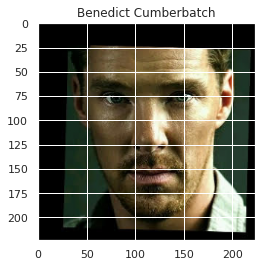

In [282]:
plt.imshow(test_image_convertedToRGB)
plt.title(dict_key_list[list(dict_val_list).index(label)][5:])

**Result**
- Model has predicted Image 2 correctly

In [283]:
## Blank Space Delimiter


## Blank Space Delimiter